In [316]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [317]:
df = pd.read_csv('ODI-2018.csv')
df.head()

,Timestamp,prog,ml,ir,stat,db,gender,choco,birth,neigh,stand,dm,rand,time,gd1,gd2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04/05/2018 11:22,Duisenberg Quantitative Risk Management,no,0,mu,nee,male,neither,10/12/1994,49000,no,0.05,7,1,Productive,Good sleep
2,04/05/2018 11:23,Computer Science,no,0,unknown,ja,male,I have no idea what you are talking about,06/08/1993,100,yes,The formmer,394749,1 a m,got a 8.5,got 2 8.5s
3,04/05/2018 11:23,Business Analytics,yes,1,sigma,ja,male,neither,25-Dec-92,5,no,Not enough,6,23,Food,Sport
4,04/05/2018 11:23,BA,yes,1,mu,ja,male,I have no idea what you are talking about,01/02/1995,2,no,0,8,0.3,-,-


In [318]:
print(df.columns.values)
df.count()

['Timestamp' 'prog' 'ml' 'ir' 'stat' 'db' 'gender' 'choco' 'birth' 'neigh'
 'stand' 'dm' 'rand' 'time' 'gd1' 'gd2']


Timestamp    217
prog         217
ml           217
ir           217
stat         217
db           217
gender       217
choco        217
birth        217
neigh        217
stand        217
dm           217
rand         217
time         217
gd1          217
gd2          217
dtype: int64

I think that categorical features might be prog, gender

In [319]:
df.info()
print('_'*40)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 16 columns):
Timestamp    217 non-null object
prog         217 non-null object
ml           217 non-null object
ir           217 non-null object
stat         217 non-null object
db           217 non-null object
gender       217 non-null object
choco        217 non-null object
birth        217 non-null object
neigh        217 non-null object
stand        217 non-null object
dm           217 non-null object
rand         217 non-null object
time         217 non-null object
gd1          217 non-null object
gd2          217 non-null object
dtypes: object(16)
memory usage: 27.3+ KB
________________________________________


,Timestamp,prog,ml,ir,stat,db,gender,choco,birth,neigh,stand,dm,rand,time,gd1,gd2
count,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217
unique,14,91,3,3,3,3,3,5,208,28,3,82,45,88,136,156
top,04/05/2018 11:27,AI,yes,0,mu,nee,male,fat,02/09/1990,1,no,1,7,01:00,Sun,Good food
freq,150,37,120,133,189,107,150,74,2,38,197,30,36,18,14,7


In [320]:
df.describe(include=['O'])

,Timestamp,prog,ml,ir,stat,db,gender,choco,birth,neigh,stand,dm,rand,time,gd1,gd2
count,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217
unique,14,91,3,3,3,3,3,5,208,28,3,82,45,88,136,156
top,04/05/2018 11:27,AI,yes,0,mu,nee,male,fat,02/09/1990,1,no,1,7,01:00,Sun,Good food
freq,150,37,120,133,189,107,150,74,2,38,197,30,36,18,14,7


In [321]:
df['gender'].astype(str)
df['prog'].astype(str)
df.describe()


,Timestamp,prog,ml,ir,stat,db,gender,choco,birth,neigh,stand,dm,rand,time,gd1,gd2
count,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217
unique,14,91,3,3,3,3,3,5,208,28,3,82,45,88,136,156
top,04/05/2018 11:27,AI,yes,0,mu,nee,male,fat,02/09/1990,1,no,1,7,01:00,Sun,Good food
freq,150,37,120,133,189,107,150,74,2,38,197,30,36,18,14,7


In [322]:
combine = [df]
gender_mapping = {'male': 0, 'female': 1, 'unknown': -1}
for dataset in combine:
    dataset['gender'] = dataset['gender'].map(gender_mapping)
    dataset['gender'] = dataset['gender'].fillna(-1)


df.gender.astype(int)    
df.head()



,Timestamp,prog,ml,ir,stat,db,gender,choco,birth,neigh,stand,dm,rand,time,gd1,gd2
0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04/05/2018 11:22,Duisenberg Quantitative Risk Management,no,0,mu,nee,0.0,neither,10/12/1994,49000,no,0.05,7,1,Productive,Good sleep
2,04/05/2018 11:23,Computer Science,no,0,unknown,ja,0.0,I have no idea what you are talking about,06/08/1993,100,yes,The formmer,394749,1 a m,got a 8.5,got 2 8.5s
3,04/05/2018 11:23,Business Analytics,yes,1,sigma,ja,0.0,neither,25-Dec-92,5,no,Not enough,6,23,Food,Sport
4,04/05/2018 11:23,BA,yes,1,mu,ja,0.0,I have no idea what you are talking about,01/02/1995,2,no,0,8,0.3,-,-


In [323]:
combine = [df]
answer_mapping = {'no': 0, 'yes': 1, 'unknown': -1}
for dataset in combine:
    dataset['ml'] = dataset['ml'].map(answer_mapping)
    dataset['ml'] = dataset['ml'].fillna(-1)

df.ml.astype(int)
df.head()


,Timestamp,prog,ml,ir,stat,db,gender,choco,birth,neigh,stand,dm,rand,time,gd1,gd2
0,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04/05/2018 11:22,Duisenberg Quantitative Risk Management,0.0,0,mu,nee,0.0,neither,10/12/1994,49000,no,0.05,7,1,Productive,Good sleep
2,04/05/2018 11:23,Computer Science,0.0,0,unknown,ja,0.0,I have no idea what you are talking about,06/08/1993,100,yes,The formmer,394749,1 a m,got a 8.5,got 2 8.5s
3,04/05/2018 11:23,Business Analytics,1.0,1,sigma,ja,0.0,neither,25-Dec-92,5,no,Not enough,6,23,Food,Sport
4,04/05/2018 11:23,BA,1.0,1,mu,ja,0.0,I have no idea what you are talking about,01/02/1995,2,no,0,8,0.3,-,-


In [324]:
combine = [df]
answer_stat_mapping = {'sigma': 0, 'mu': 1, 'unknown': -1}
for dataset in combine:
    dataset['stat'] = dataset['stat'].map(answer_stat_mapping)
    dataset['stat'] = dataset['stat'].fillna(-1)

df.stat.astype(int)
df.head()

,Timestamp,prog,ml,ir,stat,db,gender,choco,birth,neigh,stand,dm,rand,time,gd1,gd2
0,NaN,NaN,-1.0,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04/05/2018 11:22,Duisenberg Quantitative Risk Management,0.0,0,1.0,nee,0.0,neither,10/12/1994,49000,no,0.05,7,1,Productive,Good sleep
2,04/05/2018 11:23,Computer Science,0.0,0,-1.0,ja,0.0,I have no idea what you are talking about,06/08/1993,100,yes,The formmer,394749,1 a m,got a 8.5,got 2 8.5s
3,04/05/2018 11:23,Business Analytics,1.0,1,0.0,ja,0.0,neither,25-Dec-92,5,no,Not enough,6,23,Food,Sport
4,04/05/2018 11:23,BA,1.0,1,1.0,ja,0.0,I have no idea what you are talking about,01/02/1995,2,no,0,8,0.3,-,-


In [325]:
combine = [df]
answer_db_mapping = {'nee': 0, 'ja': 1, 'unknown': -1}
for dataset in combine:
    dataset['db'] = dataset['db'].map(answer_db_mapping)
    dataset['db'] = dataset['db'].fillna(-1)

df.db.astype(int)
df.head()

,Timestamp,prog,ml,ir,stat,db,gender,choco,birth,neigh,stand,dm,rand,time,gd1,gd2
0,NaN,NaN,-1.0,NaN,-1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04/05/2018 11:22,Duisenberg Quantitative Risk Management,0.0,0,1.0,0.0,0.0,neither,10/12/1994,49000,no,0.05,7,1,Productive,Good sleep
2,04/05/2018 11:23,Computer Science,0.0,0,-1.0,1.0,0.0,I have no idea what you are talking about,06/08/1993,100,yes,The formmer,394749,1 a m,got a 8.5,got 2 8.5s
3,04/05/2018 11:23,Business Analytics,1.0,1,0.0,1.0,0.0,neither,25-Dec-92,5,no,Not enough,6,23,Food,Sport
4,04/05/2018 11:23,BA,1.0,1,1.0,1.0,0.0,I have no idea what you are talking about,01/02/1995,2,no,0,8,0.3,-,-


In [326]:
combine = [df]
answer_ir_mapping = {'0': 0, '1': 1, 'unknown': -1}
for dataset in combine:
    dataset['ir'] = dataset['ir'].map(answer_ir_mapping)
    dataset['ir'] = dataset['ir'].fillna(-1)

df.ir.astype(int)
df.head()

,Timestamp,prog,ml,ir,stat,db,gender,choco,birth,neigh,stand,dm,rand,time,gd1,gd2
0,NaN,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04/05/2018 11:22,Duisenberg Quantitative Risk Management,0.0,0.0,1.0,0.0,0.0,neither,10/12/1994,49000,no,0.05,7,1,Productive,Good sleep
2,04/05/2018 11:23,Computer Science,0.0,0.0,-1.0,1.0,0.0,I have no idea what you are talking about,06/08/1993,100,yes,The formmer,394749,1 a m,got a 8.5,got 2 8.5s
3,04/05/2018 11:23,Business Analytics,1.0,1.0,0.0,1.0,0.0,neither,25-Dec-92,5,no,Not enough,6,23,Food,Sport
4,04/05/2018 11:23,BA,1.0,1.0,1.0,1.0,0.0,I have no idea what you are talking about,01/02/1995,2,no,0,8,0.3,-,-


In [328]:
combine = [df]
answer_choco_mapping = {'fat': 0, 'slim': 1, 'neither': 2, 'I have no idea what you are talking about': -1}
for dataset in combine:
    dataset['choco'] = dataset['choco'].map(answer_choco_mapping)
    dataset['choco'] = dataset['choco'].fillna(-1)

df.choco.astype(int)
df.head()

,Timestamp,prog,ml,ir,stat,db,gender,choco,birth,neigh,stand,dm,rand,time,gd1,gd2
0,NaN,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04/05/2018 11:22,Duisenberg Quantitative Risk Management,0.0,0.0,1.0,0.0,0.0,-1.0,10/12/1994,49000,no,0.05,7,1,Productive,Good sleep
2,04/05/2018 11:23,Computer Science,0.0,0.0,-1.0,1.0,0.0,-1.0,06/08/1993,100,yes,The formmer,394749,1 a m,got a 8.5,got 2 8.5s
3,04/05/2018 11:23,Business Analytics,1.0,1.0,0.0,1.0,0.0,-1.0,25-Dec-92,5,no,Not enough,6,23,Food,Sport
4,04/05/2018 11:23,BA,1.0,1.0,1.0,1.0,0.0,-1.0,01/02/1995,2,no,0,8,0.3,-,-


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 16 columns):
Timestamp    217 non-null object
prog         217 non-null object
ml           218 non-null float64
ir           218 non-null float64
stat         218 non-null float64
db           218 non-null float64
gender       218 non-null float64
choco        218 non-null float64
birth        217 non-null object
neigh        217 non-null object
stand        217 non-null object
dm           217 non-null object
rand         217 non-null object
time         217 non-null object
gd1          217 non-null object
gd2          217 non-null object
dtypes: float64(6), object(10)
memory usage: 27.3+ KB


In [331]:
df['prog'] = df['prog'].astype('str')
df.prog

combine = [df]
answer_prog_mapping = {'Computer Science': 0, 'Computer Science: Big Data Engineering' : 0,'Big data engineering':0, 
                       'CS': 0 , 'cs': 0 , 'Big Data Engineering': 0, 'MSc Computer Science ': 0,
                       'Master Computer Science: Big Data Engineering': 0, 'Masters Computer Science(big data engineering)': 0,
                       'AI': 1, 'Artificial Intelligence': 1, 'AI VU': 1, 'Ai': 1, 'A. I. ': 1, 'AI (Cognitive Sciences)' : 1,
                       'AI (VU version)': 1, 'AI premaster' : 1, 'Artificial Intelligence (Socially Aware Computing)': 1,
                       'Artificial intelligence ': 1, 'MSc AI and MSc CLS': 1,
                       'MSc Artificial Intelligence': 1, 'Msc Artificial intelligence': 1,
                       'BA': 6, 'Business Analytics': 6, 'Business analytics' : 6,'Business Analytics ': 6, 'business analytics': 6,
                       'Business Analytics Msc': 6, 'Business Analytics/ operations research' : 6, 'OR': 6,
                       'Business Analytics Msc': 6, 'Master Business Analytics ': 6,
                       'Computational Science': 3, 'Computational Science (JD)': 3,'Computational science': 3,'CLS' : 3, 
                       'Msc Computational science': 3, 'CSL': 3, 'Cls': 3, 'Comoputational science': 3,
                       'Computational Science ': 3, 'MSc Computational Science (Joint Degree)': 3,
                       'Econometrics': 4, 'Econometrics ': 4, 'EOR': 4, 'Econometrics & Operations Research': 4,
                       'M Financial Economtrics': 4, 'MSc Econometrics' : 4, 'Master Econometrics & Operations Research': 4,
                       'Master Econometrics and operations research': 4,
                       'PhD': 5, 'PhD student': 5, 'PhD student at FGB': 5,
                       'Bioinformatics': 2, 'Bioinformatics and Systems Biology' : 2, 'Bioinformatics and systems biology': 2,
                       'Bioinformatics & Systems Biology' : 2,'MSc Bioinformatics and Systems Biology' : 2, 'bioinformatics': 2, 
                       'Bioinformatics & System Biology' : 2, 'Bioinformatics & Systems biology' : 2, 'Bioinformatics and SysBio' : 2,
                       'Bioinformatics and Systems biology': 2, 'Bioinformatics master': 2, 'Bioinformatcis': 2,
                       'MSc Bioinformatics and Systems Biology': 2, 'MA Bioinformatics': 2, 'MSC Bioinformatics':2, 
                       'Master Bionformatics and Systems Biology': 2, 'System Biology and Bioinformatics': 2,
                       'Msc. Bioinformatics and Systems Biology' : 2,
                       'QRM': 7, 'Quantitative Risk Management': 7, 'Quantitative risk management': 7, 'Finance DHP QRM': 7,
                       'Duisenberg Honors Program Quantitative Risk Managament': 7, 'Duisenberg Quantitative Risk Management': 7,
                      } # 'Exchange': 8,
                      # 'Mathematics': 9, 'Mathematics Exchange': 9,
                       #'Physics': 10,}
                      # 'Master Human Movement Science': 11,
                       #'Economics': 12,'Finance': 12}
for dataset in combine:
    dataset['prog'] = dataset['prog'].map(answer_prog_mapping)
    dataset['prog'] = dataset['prog'].fillna(-1)


df.prog.describe()

count    218.000000
mean       2.683486
std        2.495305
min       -1.000000
25%        1.000000
50%        2.000000
75%        6.000000
max        7.000000
Name: prog, dtype: float64

 1.0    50
 6.0    46
 2.0    23
 3.0    23
-1.0    22
 0.0    21
 4.0    19
 7.0    10
 5.0     4
Name: prog, dtype: int64


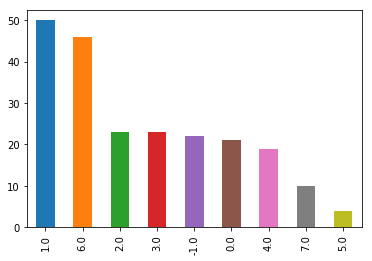

In [332]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show
print(df.prog.value_counts())
df.prog.value_counts().plot.bar();

In [333]:
data = df.filter(['prog', 'ml', 'ir', 'stat', 'db', 'gender', 'choco'], axis=1)
data.head()

,prog,ml,ir,stat,db,gender,choco
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,7.0,0.0,0.0,1.0,0.0,0.0,-1.0
2,0.0,0.0,0.0,-1.0,1.0,0.0,-1.0
3,6.0,1.0,1.0,0.0,1.0,0.0,-1.0
4,6.0,1.0,1.0,1.0,1.0,0.0,-1.0


c:\users\giogge\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\giogge\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


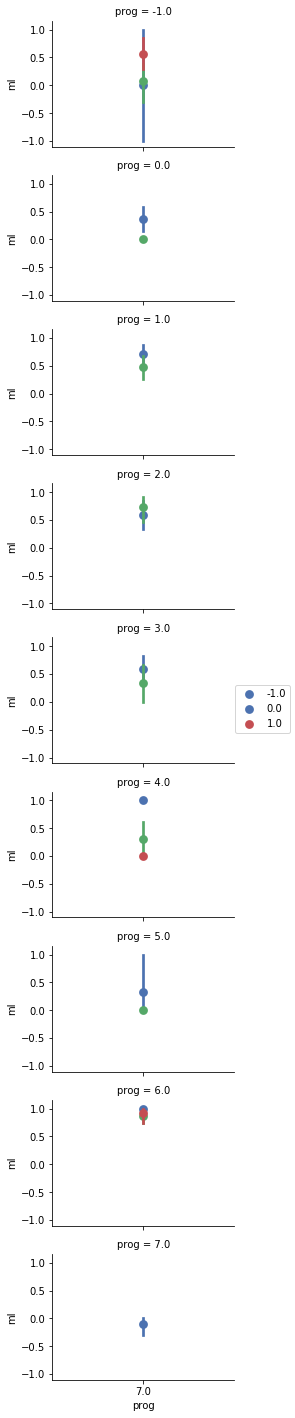

In [334]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(data, row='prog', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'prog', 'ml', 'gender', palette='deep')
grid.add_legend()

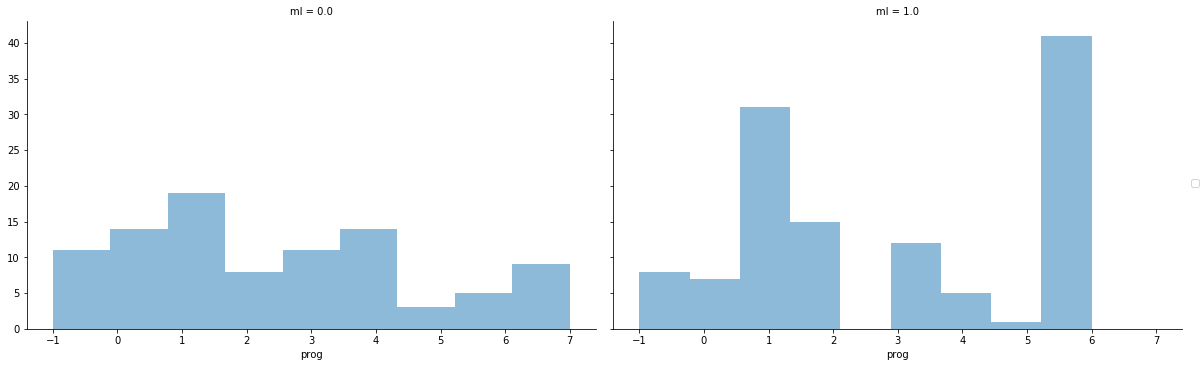

In [335]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
mldata  = data[data.ml >= 0.0]
grid = sns.FacetGrid(mldata, col='ml', size=5.2, aspect=1.6)
grid.map(plt.hist, 'prog', alpha=.5, bins=9)
grid.add_legend();

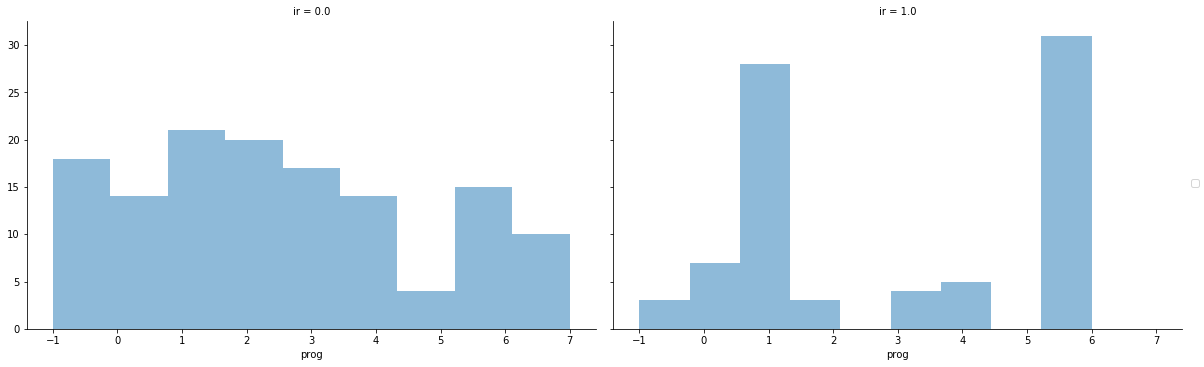

In [336]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
irdata  = data[data.ir >= 0.0]
grid = sns.FacetGrid(irdata, col='ir', size=5.2, aspect=1.6)
grid.map(plt.hist, 'prog', alpha=.5, bins=9)
grid.add_legend();

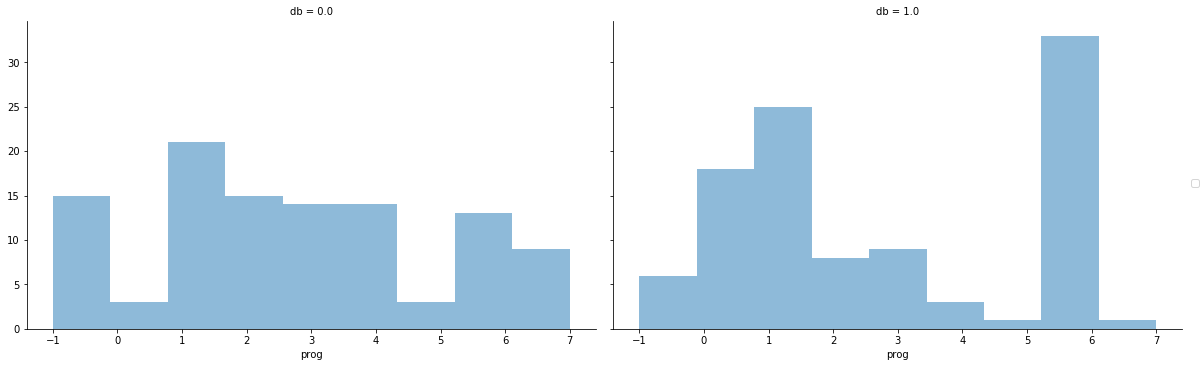

In [337]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
dbdata  = data[data.db >= 0.0]
grid = sns.FacetGrid(dbdata, col='db', size=5.2, aspect=1.6)
grid.map(plt.hist, 'prog', alpha=.5, bins=9)
grid.add_legend();

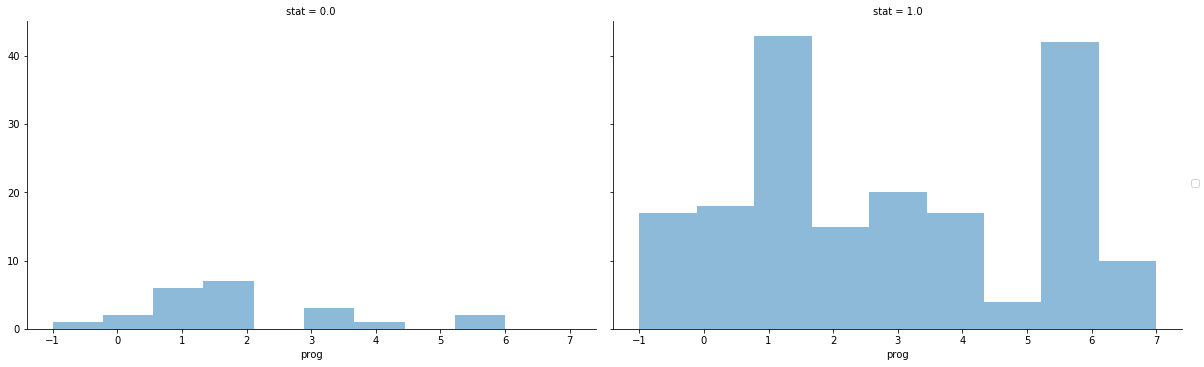

In [338]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
statdata  = data[data.stat >= 0.0]
genderdata  = statdata[statdata.gender >= 0.0]
grid = sns.FacetGrid(genderdata, col='stat', size=5.2, aspect=1.6)
grid.map(plt.hist, 'prog', alpha=.5, bins=9)
grid.add_legend();

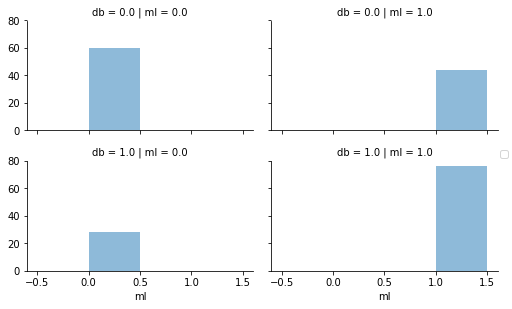

In [339]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
dbdata  = data[data.db >= 0.0]
mldata  = dbdata[dbdata.ml >= 0.0]
grid = sns.FacetGrid(mldata, row='db', col='ml',  size=2.2, aspect=1.6)
grid.map(plt.hist, 'ml', alpha=.5, bins=2)
grid.add_legend();

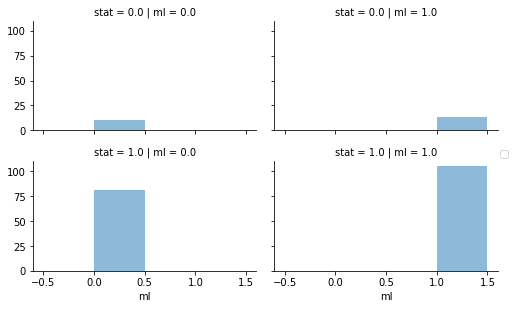

In [340]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
statdata  = data[data.stat >= 0.0]
mldata  = statdata[statdata.ml >= 0.0]
grid = sns.FacetGrid(mldata, row='stat', col='ml',  size=2.2, aspect=1.6)
grid.map(plt.hist, 'ml', alpha=.5, bins=2)
grid.add_legend();

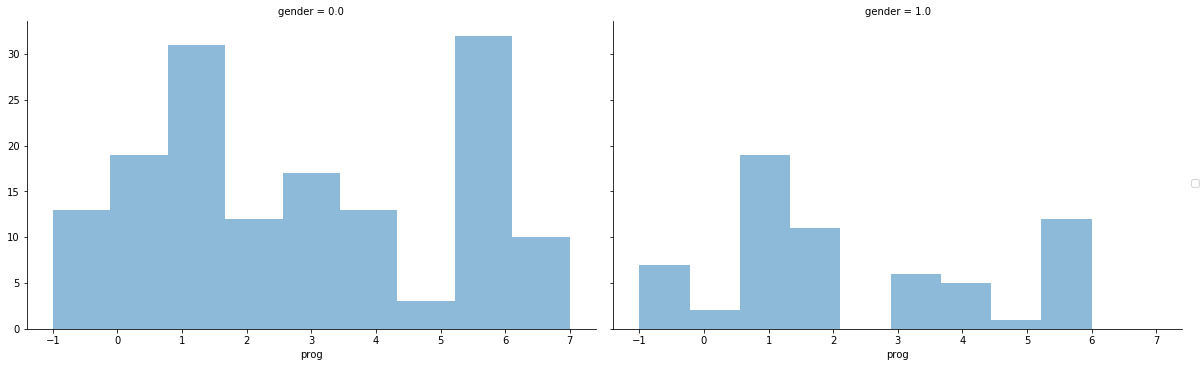

In [347]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
genderdata  = data[data.gender >= 0.0]
grid = sns.FacetGrid(genderdata, col='gender', size=5.2, aspect=1.6)
grid.map(plt.hist, 'prog', alpha=.5, bins=9)
grid.add_legend();

In [350]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
chocodata  = data[data.choco >= 0.0]
grid = sns.FacetGrid(chocodata, col='choco', size=3.2, aspect=1.6)
grid.map(plt.hist, 'gender', alpha=.5, bins=3)
grid.add_legend();

ValueError: left cannot be >= right

<Figure size 8x230.4 with 0 Axes>

c:\users\giogge\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\giogge\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


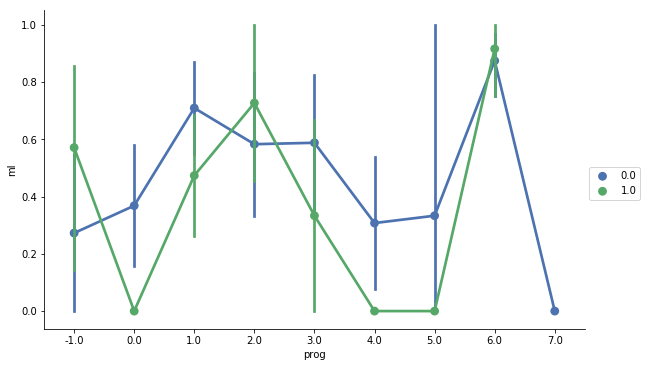

In [351]:
mldata = data[data.ml >= 0.0]
genderdata  = mldata[mldata.gender >= 0.0]
grid = sns.FacetGrid(genderdata, size=5.2, aspect=1.6)
grid.map(sns.pointplot, 'prog', 'ml', 'gender', palette='deep')
grid.add_legend()

c:\users\giogge\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\giogge\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


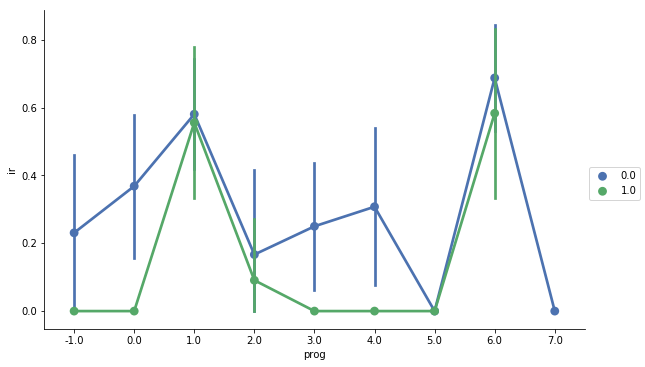

In [352]:
irdata = data[data.ir >= 0.0]
genderdata  = irdata[irdata.gender >= 0.0]
grid = sns.FacetGrid(genderdata, size=5.2, aspect=1.6)
grid.map(sns.pointplot, 'prog', 'ir', 'gender', palette='deep')
grid.add_legend()

c:\users\giogge\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\giogge\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


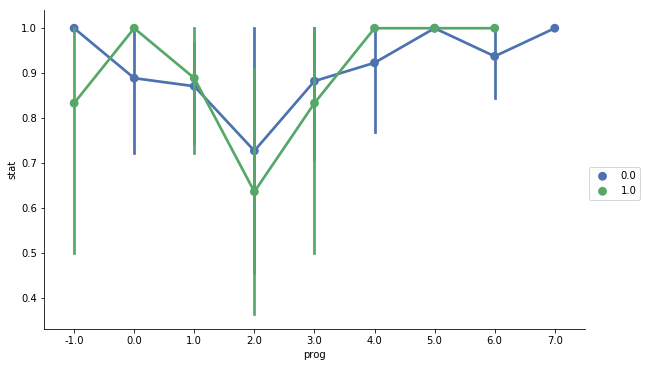

In [353]:
statdata = data[data.stat >= 0.0]
genderdata  = statdata[statdata.gender >= 0.0]
grid = sns.FacetGrid(genderdata, size=5.2, aspect=1.6)
grid.map(sns.pointplot, 'prog', 'stat', 'gender', palette='deep')
grid.add_legend()

c:\users\giogge\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\giogge\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


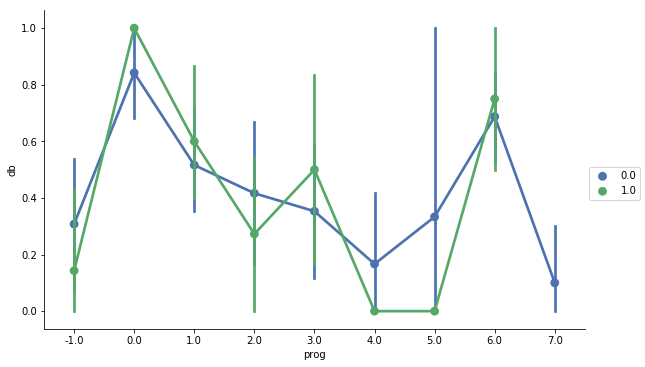

In [354]:
dbdata = data[data.db >= 0.0]
genderdata  = dbdata[dbdata.gender >= 0.0]
grid = sns.FacetGrid(genderdata, size=5.2, aspect=1.6)
grid.map(sns.pointplot, 'prog', 'db', 'gender', palette='deep')
grid.add_legend()

In [359]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)
train.head()
test.head()

,prog,ml,ir,stat,db,gender,choco
161,7.0,0.0,0.0,1.0,0.0,0.0,-1.0
159,0.0,0.0,0.0,1.0,1.0,1.0,-1.0
138,6.0,0.0,0.0,1.0,0.0,1.0,-1.0
43,1.0,1.0,1.0,1.0,0.0,0.0,-1.0
146,1.0,0.0,0.0,1.0,0.0,1.0,-1.0


In [361]:
X_train = train.drop("ml", axis=1)
Y_train = train["ml"]
X_test  = test.drop("choco", axis = 1).copy()
X_train.shape, Y_train.shape, X_test.shape

((174, 6), (174,), (44, 6))

In [362]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

74.71

In [373]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
5,choco,1.191525
2,stat,-0.323545
1,ir,-0.531361
4,gender,-0.731830
3,db,-0.824057
0,ml,-0.968072


In [364]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

77.59

In [365]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

82.18

In [366]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.41

In [367]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

c:\users\giogge\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


71.84

In [368]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

74.14

In [369]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

c:\users\giogge\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


69.54

In [370]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

83.91

In [371]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

83.91

In [372]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,83.91
8,Decision Tree,83.91
1,KNN,82.18
0,Support Vector Machines,77.59
2,Logistic Regression,74.71
7,Linear SVC,74.14
4,Naive Bayes,72.41
5,Perceptron,71.84
6,Stochastic Gradient Decent,69.54


In [ ]:
#todo:

In [ ]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show

df.ml.plot.bar();

In [65]:
df.gd1 = df.gd1.astype(str)
df.gd1.head()
for item in df.gd1:
    if 'Food' in item:
        item = 'food'
df.gd1

0                                            nan
1                                     Productive
2                                      got a 8.5
3                                           Food
4                                              -
5                                          sleep
6                                      Chocolate
7                                      Chocolate
8                                       Sunshine
9                                            Sun
10                                     Free time
11                                   Good coffee
12                                          Cats
13                                Sunny weather 
14                                   Good grades
15                                          Food
16                        Pancakes for breakfast
17                                         Sleep
18                                         Sleep
19                                    Good sleep
20                  